In [1]:
# Load the data
import mne
from mne_icalabel import label_components
from mne_bids import (BIDSPath,read_raw_bids)
# import ccs_eeg_utils

# path where to save the datasets.
bids_root = "../ds004147/"
subject_id = '27'


bids_path = BIDSPath(subject=subject_id,task="casinos",
                     datatype='eeg', suffix='eeg',
                     root=bids_root)

# read the file
raw = read_raw_bids(bids_path)
# raw.info["bads"].extend(['T7', 'TP9', 'F7', 'FC5', 'Fp1'])

# fix the annotations readin
# ccs_eeg_utils.read_annotations_core(bids_path,raw)

Extracting parameters from ..\ds004147\sub-27\eeg\sub-27_task-casinos_eeg.vhdr...
Setting channel info structure...
Reading events from ..\ds004147\sub-27\eeg\sub-27_task-casinos_events.tsv.
The event "Stimulus" refers to multiple event values. Creating hierarchical event names.
    Renaming event: Stimulus -> Stimulus/S  1
    Renaming event: Stimulus -> Stimulus/S  2
    Renaming event: Stimulus -> Stimulus/S  3
    Renaming event: Stimulus -> Stimulus/S  4
    Renaming event: Stimulus -> Stimulus/S  6
    Renaming event: Stimulus -> Stimulus/S  1
    Renaming event: Stimulus -> Stimulus/S  2
    Renaming event: Stimulus -> Stimulus/S  3
    Renaming event: Stimulus -> Stimulus/S  5
    Renaming event: Stimulus -> Stimulus/S  6
    Renaming event: Stimulus -> Stimulus/S  1
    Renaming event: Stimulus -> Stimulus/S  2
    Renaming event: Stimulus -> Stimulus/S  3
    Renaming event: Stimulus -> Stimulus/S  5
    Renaming event: Stimulus -> Stimulus/S  7
    Renaming event: Stimulus -

C:\Users\mquad\AppData\Local\Temp\ipykernel_14676\1662537594.py:17: RuntimeWarning: Unable to map the following column(s) to to MNE:
participant: 27
date: 18-Mar-2022 13:55:40
handedness: R
order: 50-50 mixed 80-20
stimuli: a lemon an orange
  raw = read_raw_bids(bids_path)


In [2]:
raw

<RawBrainVision | sub-27_task-casinos_eeg.eeg, 31 x 3161620 (3161.6 s), ~31 kB, data not loaded>

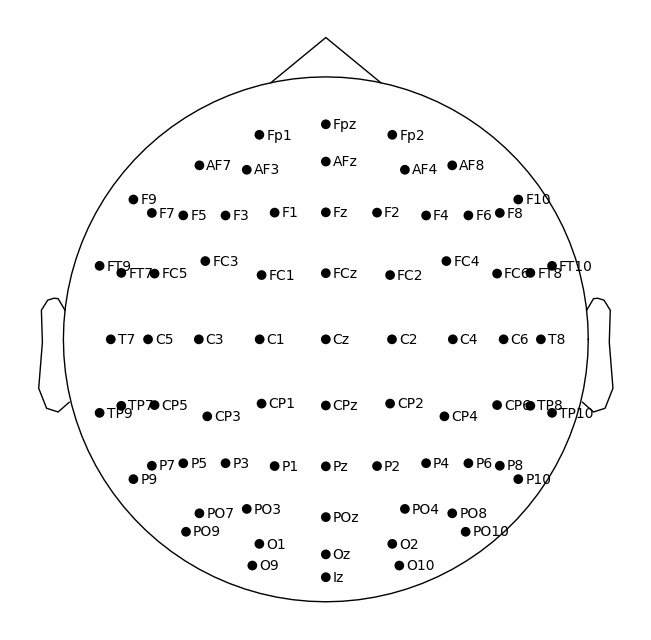

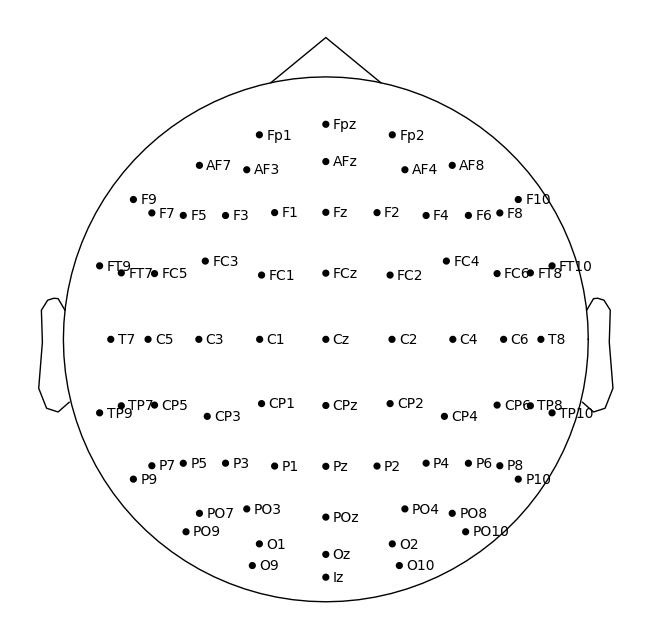

In [3]:
# Assign the topology of the easycap to our raw data so we can create the topology map
easycap_montage = mne.channels.make_standard_montage("easycap-M1")
raw.set_montage(easycap_montage)
easycap_montage.plot()

Using matplotlib as 2D backend.


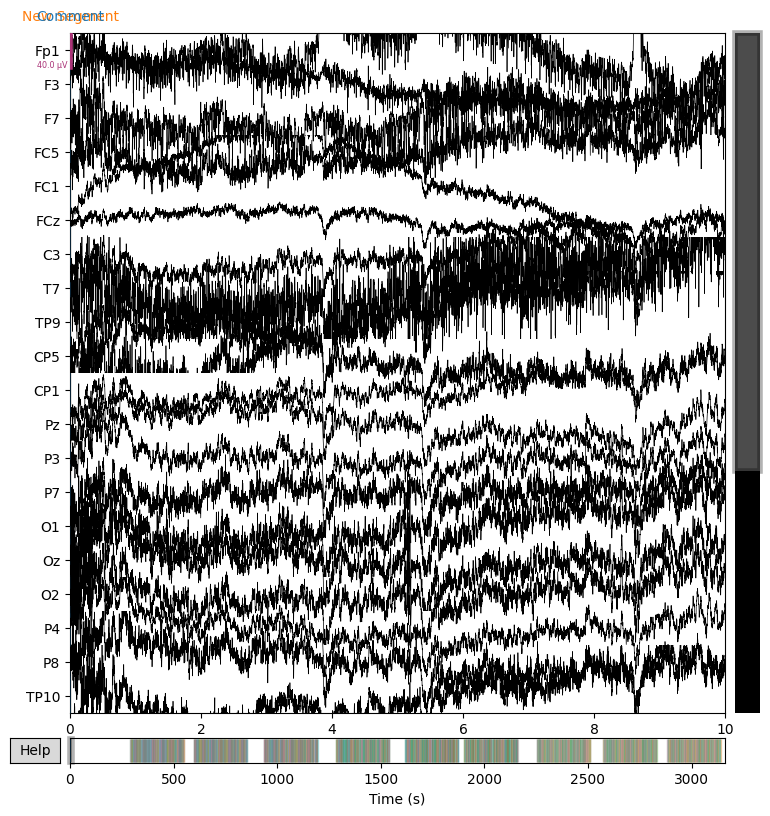

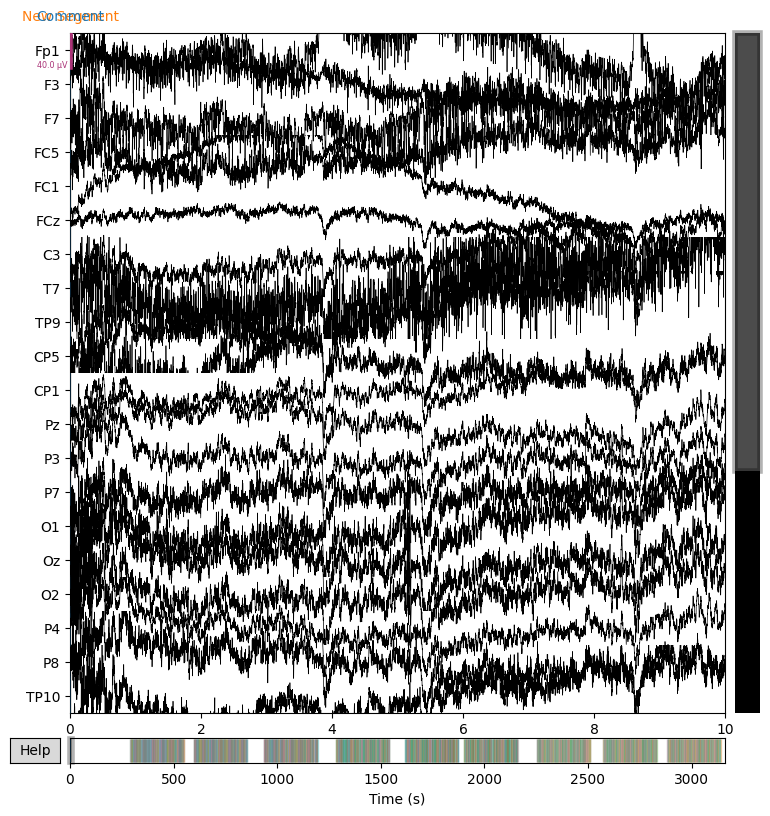

In [4]:
# %matplotlib qt
raw.plot()

In [5]:
raw

<RawBrainVision | sub-27_task-casinos_eeg.eeg, 31 x 3161620 (3161.6 s), ~43 kB, data not loaded>

#### Plot PSD before lowpass filter

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


C:\Users\mquad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


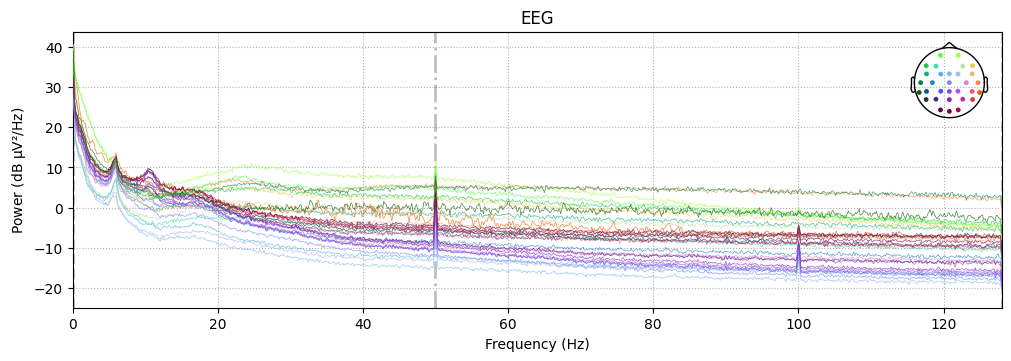

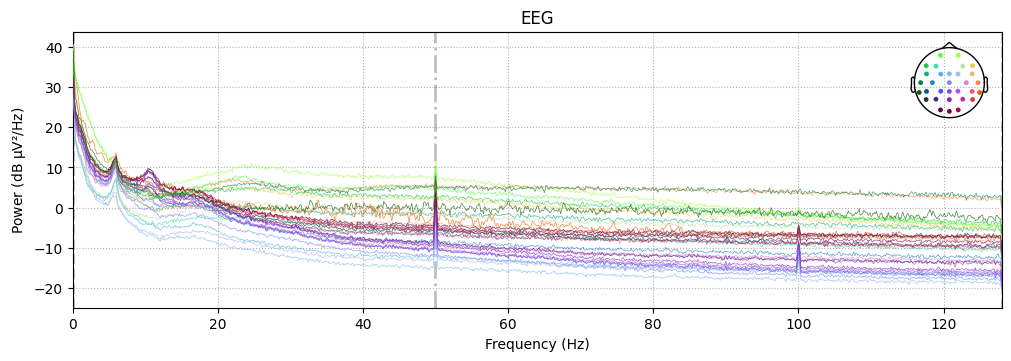

In [6]:
raw.resample(256, npad="auto")

raw.compute_psd().plot()

In [7]:
# raw.compute_psd(fmax=50).plot(picks="data", exclude="bads", amplitude=False)
# raw.plot(duration=5, n_channels=30)
# print(raw.info)

In [8]:
raw.load_data()
raw.filter(l_freq=1, h_freq=100, method='fir', fir_design='firwin')
notch_filter_freq = [50]
# if subject_id == "27":
#     notch_filter_freq = [50, 100]
raw.notch_filter(freqs=notch_filter_freq, method='fir', fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 845 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


<RawBrainVision | sub-27_task-casinos_eeg.eeg, 31 x 809375 (3161.6 s), ~191.5 MB, data loaded>

#### Plot the PSD after lowpass filtering

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


C:\Users\mquad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


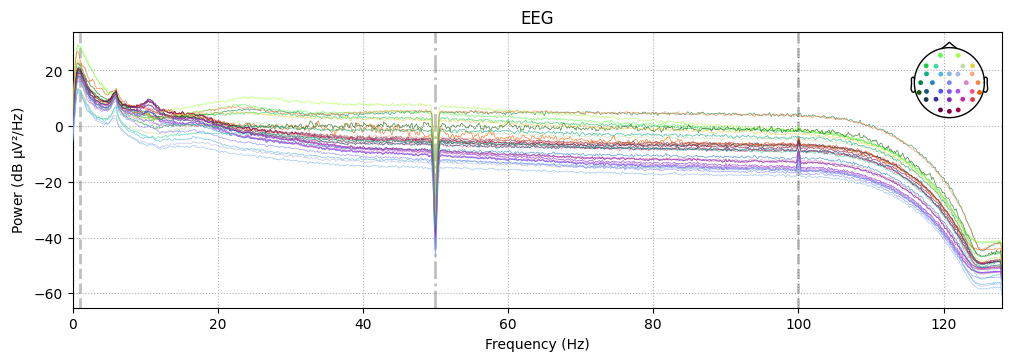

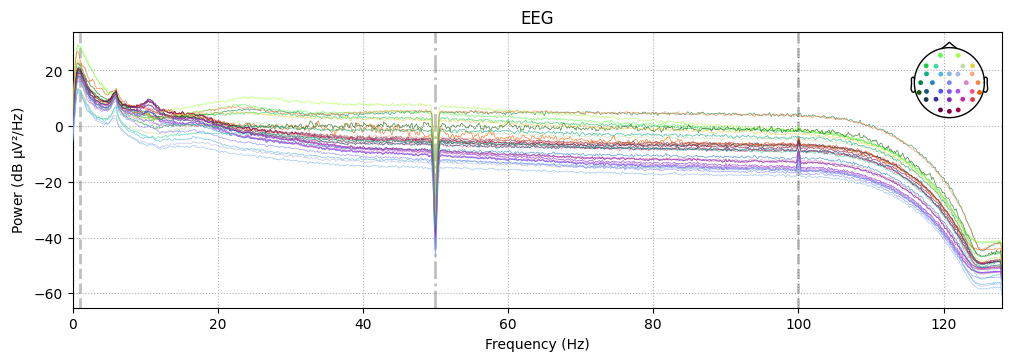

In [9]:
raw.compute_psd().plot()

Effective window size : 8.000 (s)


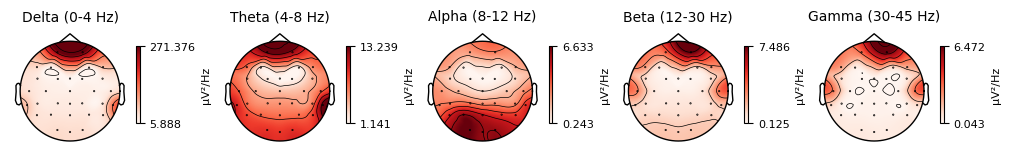

In [10]:
raw.compute_psd().plot_topomap();

#### Rereference

In [11]:
raw.set_eeg_reference('average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


<RawBrainVision | sub-27_task-casinos_eeg.eeg, 31 x 809375 (3161.6 s), ~191.5 MB, data loaded>

Effective window size : 8.000 (s)


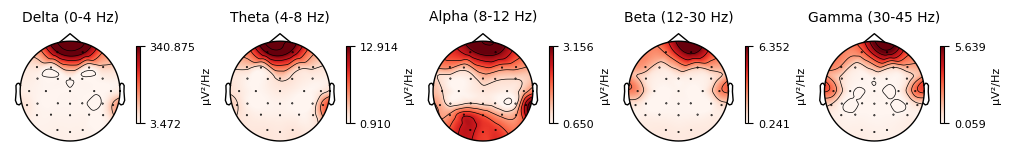

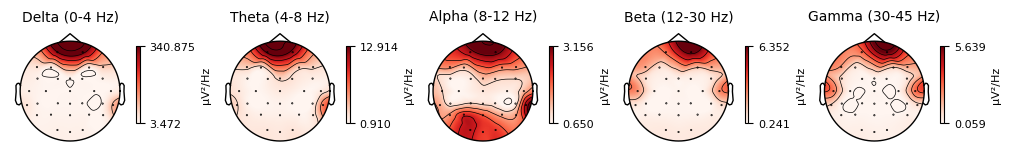

In [12]:
raw.compute_psd().plot_topomap()

#### ICA

In [13]:
ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter="auto", method='infomax', fit_params=dict(extended=True))
ica.fit(raw)


Fitting ICA to data using 31 channels (please be patient, this may take a while)
Selecting by number: 20 components
Computing Extended Infomax ICA
Fitting ICA took 83.1s.


<ICA | raw data decomposition, method: infomax (fit in 500 iterations on 809375 samples), 20 ICA components (31 PCA components available), channel types: eeg, no sources marked for exclusion>

In [14]:
ic_labels = label_components(raw, ica, method='iclabel')
exclude_idx = [
    idx for idx, label in enumerate(ic_labels["labels"]) if label not in ["brain", "other"]
]
print(f"Excluding these ICA components: {exclude_idx}")

Excluding these ICA components: [0, 2, 3, 4, 5, 7, 10, 11, 12, 15]


Creating RawArray with float64 data, n_channels=20, n_times=809375
    Range : 0 ... 809374 =      0.000 ...  3161.617 secs
Ready.


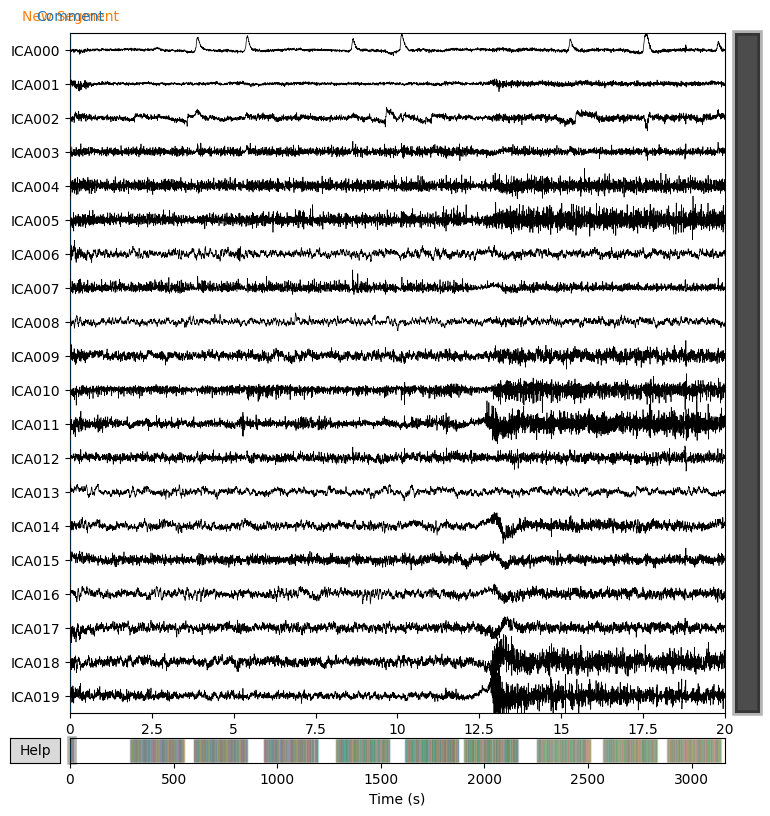

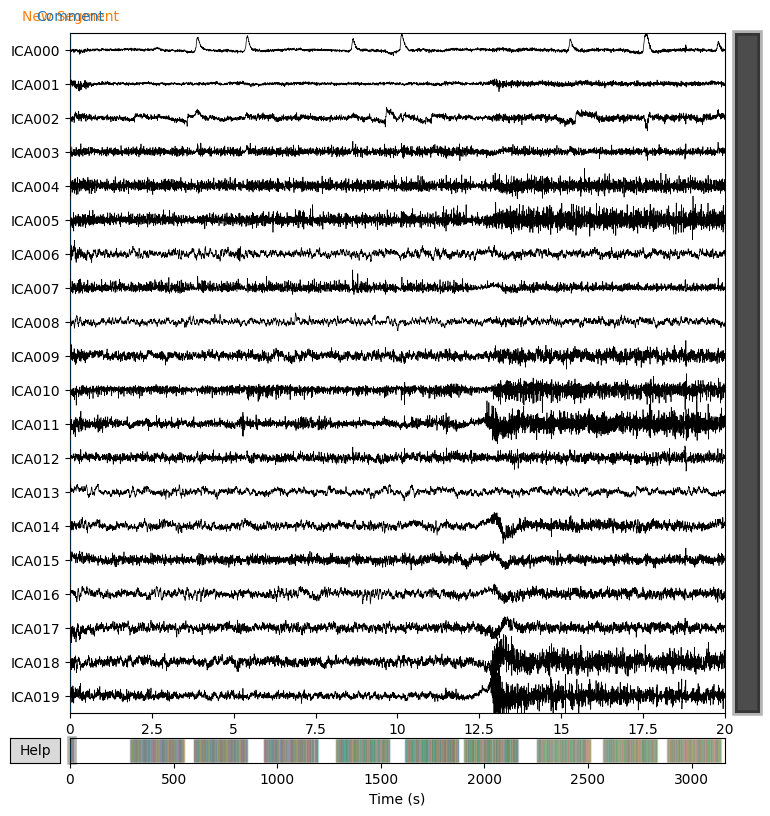

In [15]:
ica.plot_sources(raw)

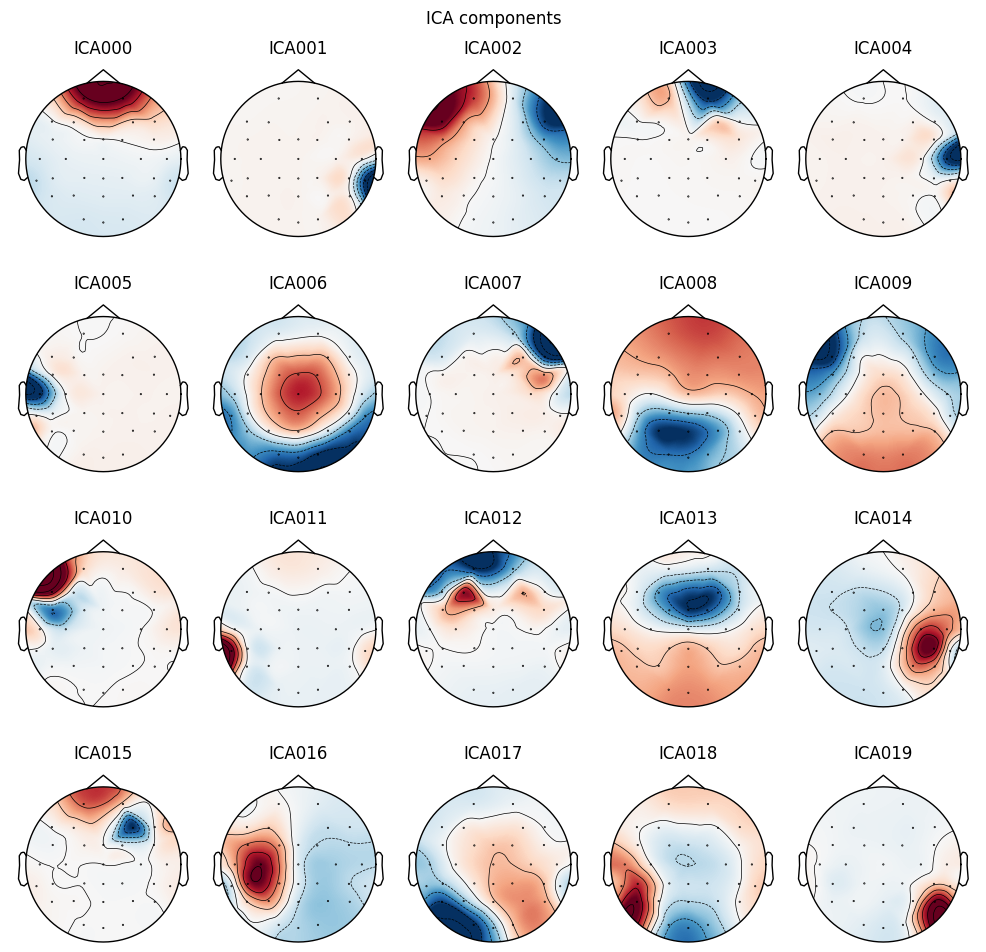

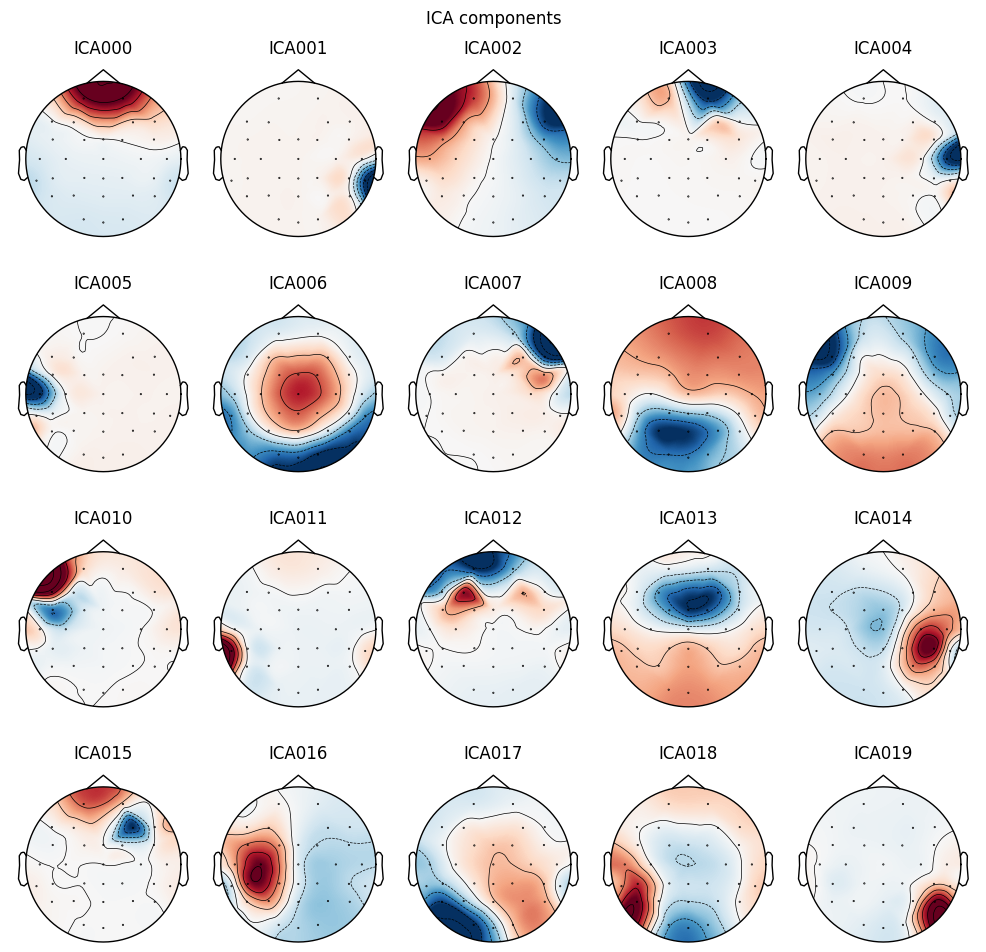

In [16]:
ica.plot_components()

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 10 ICA components
    Projecting back using 31 PCA components


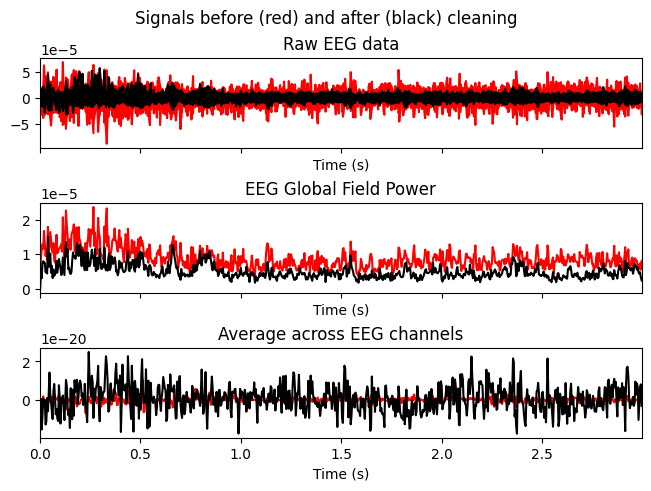

In [17]:
ica.plot_overlay(raw, exclude=exclude_idx);

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1580 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1580 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1580 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1580 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1580 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1580 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1580 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1580 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1580 matching events found
No baseline correction appl

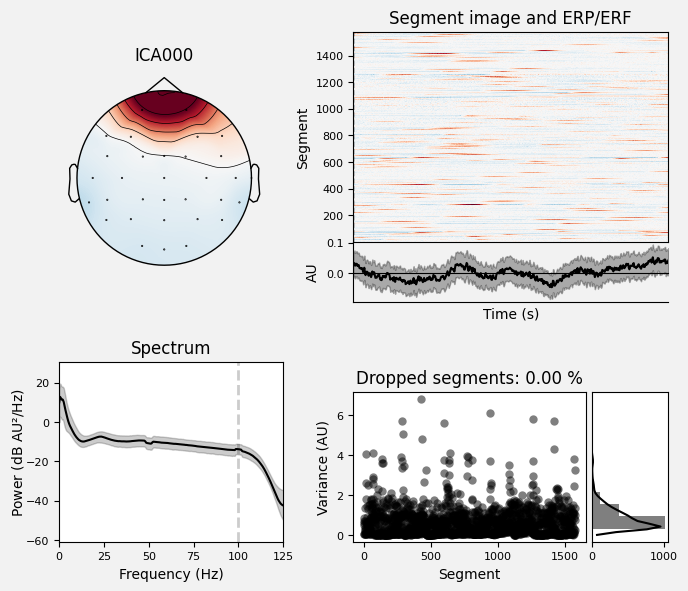

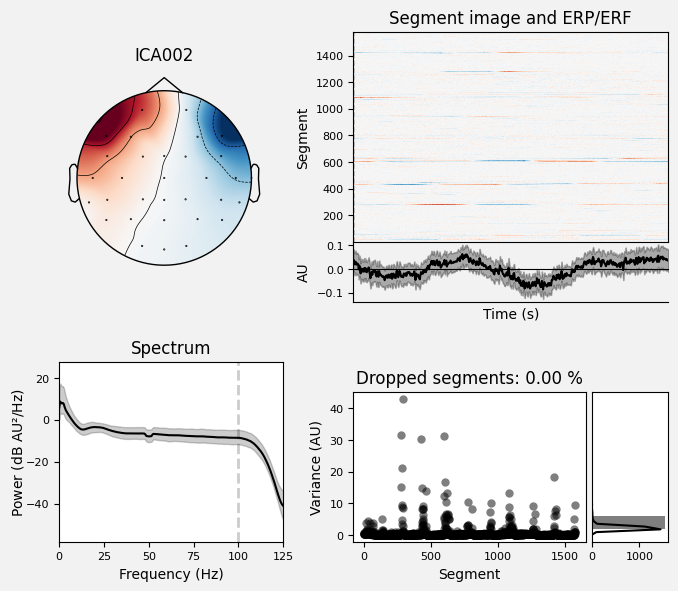

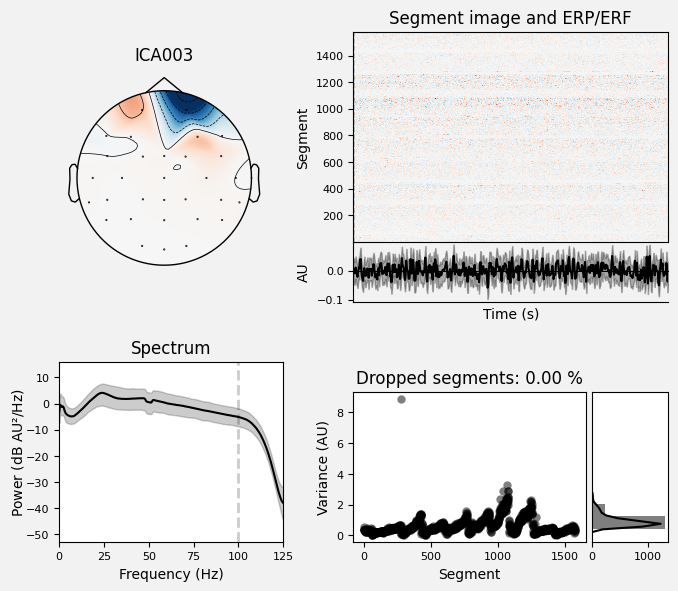

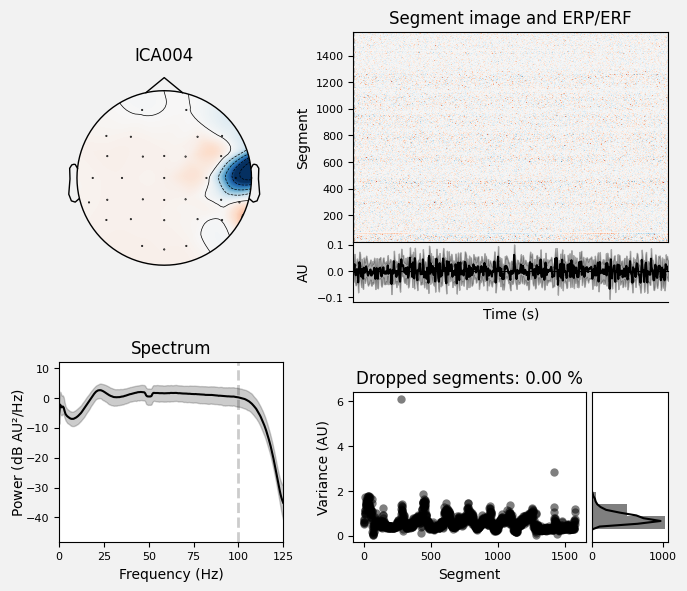

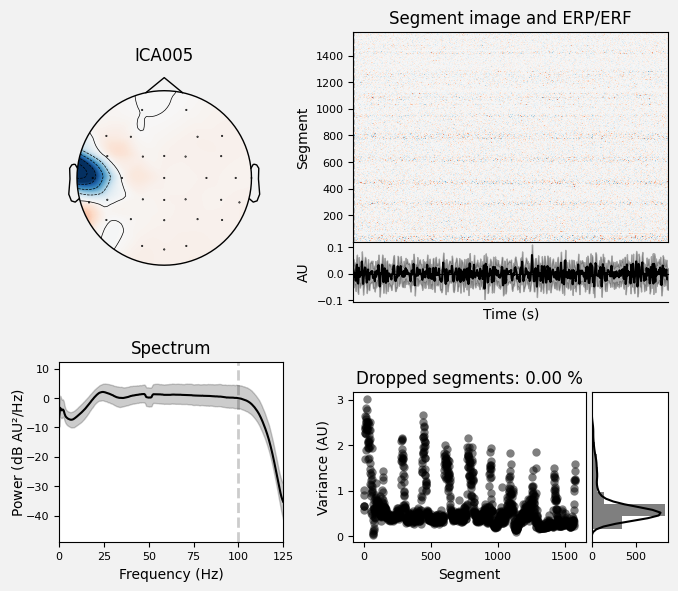

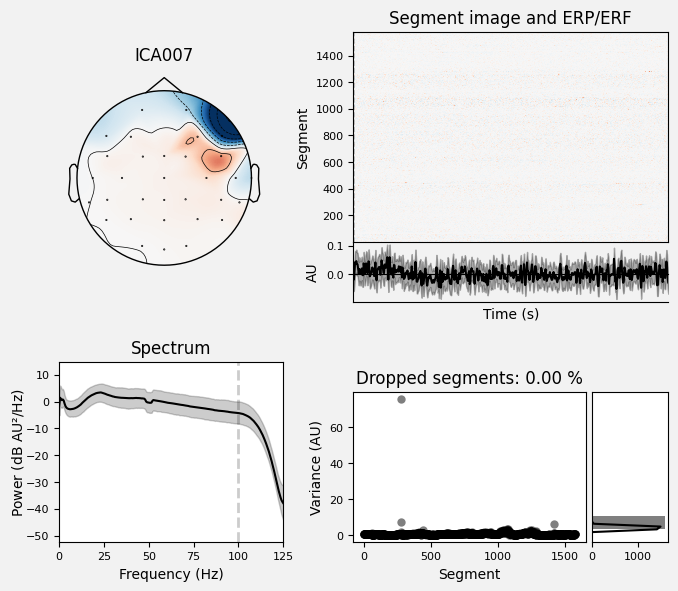

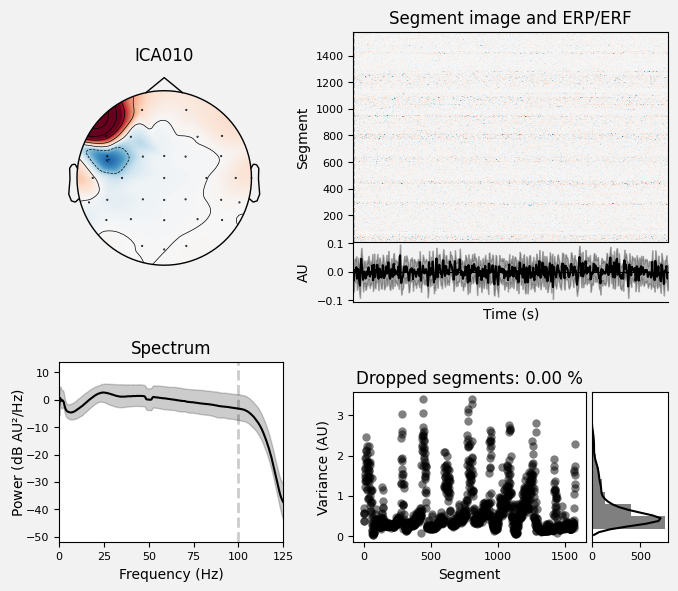

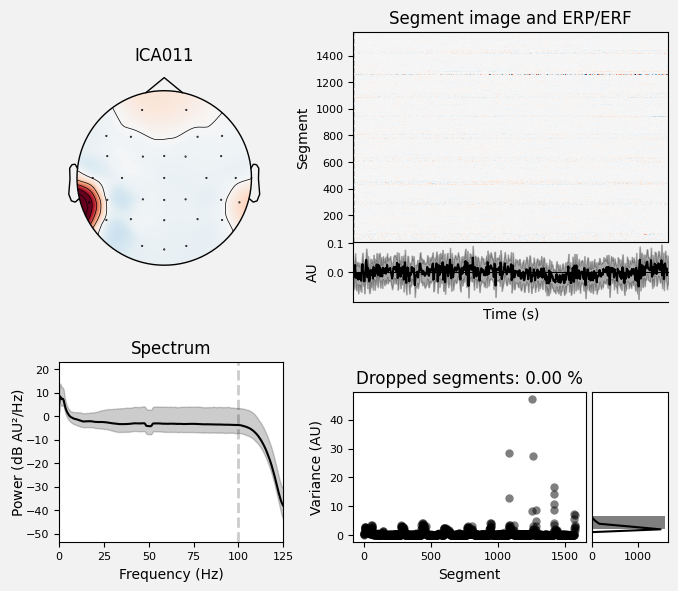

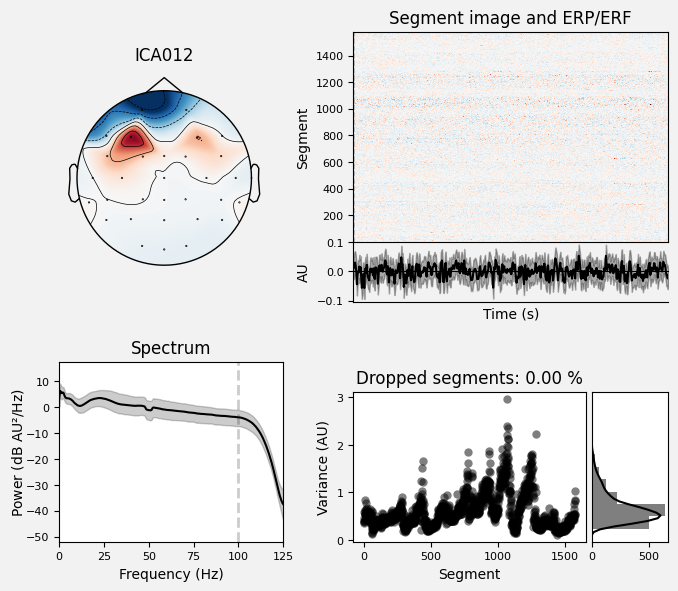

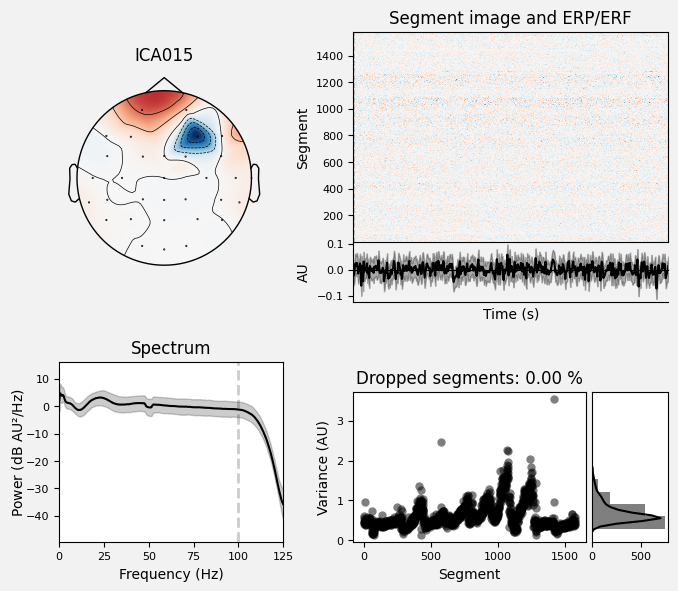

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [18]:
# ica.plot_properties(raw, picks=[0, 1])
ica.plot_properties(raw, picks=exclude_idx)

In [19]:
# https://mne.tools/stable/auto_tutorials/preprocessing/40_artifact_correction_ica.html#tut-artifact-ica
ica.exclude = exclude_idx # the ica channels like heart beat, blinks, ...
old_raw = raw.copy()
ica.apply(raw)


raw.filter(l_freq=0.1, h_freq=40, method='fir', fir_design='firwin')

Applying ICA to Raw instance
    Transforming to ICA space (20 components)
    Zeroing out 10 ICA components
    Projecting back using 31 PCA components
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 8449 samples (33.004 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s


<RawBrainVision | sub-27_task-casinos_eeg.eeg, 31 x 809375 (3161.6 s), ~191.5 MB, data loaded>

In [20]:
raw

<RawBrainVision | sub-27_task-casinos_eeg.eeg, 31 x 809375 (3161.6 s), ~191.5 MB, data loaded>

#### Epoching

In [21]:
# events,events_dict = mne.events_from_annotations(raw)
# wanted_keys = [e for e in events_dict.keys() if "Stimulus" in e]

# # subset the large event-dictionary
# events_dict_stim = dict((k, events_dict[k]) for k in wanted_keys if k in events_dict)
# epochs = mne.Epochs(raw,events,events_dict_stim,tmin=-0.2,tmax=0.6)

# # print(raw)
# # import matplotlib.pyplot as plt
# # plt.plot(epochs.get_data()[0])
# epochs.plot(picks="FCz")

In [22]:
# epochs[0].plot(picks="FCz")

In [23]:
# %matplotlib qt
# raw.plot()
# print(epochs.metadata)
# epochs[0].plot_psd_topo()

In [24]:
# Detect events from annotations (or extract them if present in raw data)
events, event_id = mne.events_from_annotations(raw)

# View the extracted events and their types
print("Events:\n", events)
print("Event IDs:\n", event_id)

# Step 7: Define epoch parameters
tmin, tmax = -0.2, 0.6  # Time range in seconds

# Detect events
print("Detected events:", event_id)
events, event_id = mne.events_from_annotations(raw)

# Extract relevant cue-locked event IDs
cue_event_id = {key: event_id[key] for key in event_id if key in [
    'Stimulus/S  2', 'Stimulus/S 12', 'Stimulus/S 22', 'Stimulus/S 32']}

# Extract relevant feedback-locked event IDs (WIN)
feedback_event_id = {key: event_id[key] for key in event_id if key in [
    'Stimulus/S  6', 'Stimulus/S 16', 'Stimulus/S 26', 'Stimulus/S 36']}

loss_event_id = {key: event_id[key] for key in event_id if key in [
    'Stimulus/S  7', 'Stimulus/S 17', 'Stimulus/S 27', 'Stimulus/S 37']}



print("Cue Event IDs:", cue_event_id)
print("Feedback Event IDs:", feedback_event_id)

# Define rejection criteria
reject_criteria = dict(eeg=150e-6)  # Add 150 µV threshold for EOG channels

win_events = {
    "S  6": "win (low-task, low-cue)",
    "S 16": "win (mid-task, low-cue)",
    "S 26": "win (mid-task, high-cue)",
    "S 36": "win (high-task, high-cue)"
}
loss_events = {
    "S  7": "loss (low-task, low-cue)",
    "S 17": "loss (mid-task, low-cue)",
    "S 27": "loss (mid-task, high-cue)",
    "S 37": "loss (high-task, high-cue)"
}

win_epochs = {}
loss_epochs = {}

for key, event_type in win_events.items():
    win_event = mne.Epochs(
        raw, events, event_id=event_id[f"Stimulus/{key}"], tmin=tmin, tmax=tmax,
        baseline=(None, 0), reject=reject_criteria, preload=True, reject_by_annotation=True
    )
    win_epochs[event_type] = win_event.apply_baseline((None, 0))


for key, event_type in loss_events.items():
    loss_event = mne.Epochs(
        raw, events, event_id=event_id[f"Stimulus/{key}"], tmin=tmin, tmax=tmax,
        baseline=(None, 0), reject=reject_criteria, preload=True, reject_by_annotation=True
    )
    loss_epochs[event_type] = loss_event.apply_baseline((None, 0))


# Create cue-locked epochs with artifact rejection
cue_epochs = mne.Epochs(
    raw, events, event_id=cue_event_id, tmin=tmin, tmax=tmax,
    baseline=(None, 0), reject=reject_criteria, preload=True, reject_by_annotation=True
)

# Create feedback-locked epochs with artifact rejection
feedback_epochs = mne.Epochs(
    raw, events, event_id=feedback_event_id, tmin=tmin, tmax=tmax,
    baseline=(None, 0), reject=reject_criteria, preload=True, reject_by_annotation=True
)
# feedback_epochs.apply_baseline((None, 0))


# Create feedback-locked epochs with artifact rejection
loss_epochs_list = mne.Epochs(
    raw, events, event_id=loss_event_id, tmin=tmin, tmax=tmax,
    baseline=(None, 0), reject=reject_criteria, preload=True, reject_by_annotation=True
)
# loss_epochs.apply_baseline((None, 0))



# Save epochs
# cue_epochs.save("subject27_cue_epochs-epo.fif", overwrite=True)
# feedback_epochs.save("subject27_feedback_epochs-epo.fif", overwrite=True)

# Print details of dropped epochs
print(f"Number of cue epochs dropped: {cue_epochs.drop_log_stats()}") 
print(f"Number of feedback epochs dropped: {feedback_epochs.drop_log_stats()}")



Used Annotations descriptions: [np.str_('Comment'), np.str_('New Segment'), np.str_('Stimulus/S  1'), np.str_('Stimulus/S  2'), np.str_('Stimulus/S  3'), np.str_('Stimulus/S  4'), np.str_('Stimulus/S  5'), np.str_('Stimulus/S  6'), np.str_('Stimulus/S  7'), np.str_('Stimulus/S 11'), np.str_('Stimulus/S 12'), np.str_('Stimulus/S 13'), np.str_('Stimulus/S 14'), np.str_('Stimulus/S 15'), np.str_('Stimulus/S 16'), np.str_('Stimulus/S 17'), np.str_('Stimulus/S 21'), np.str_('Stimulus/S 22'), np.str_('Stimulus/S 23'), np.str_('Stimulus/S 24'), np.str_('Stimulus/S 25'), np.str_('Stimulus/S 26'), np.str_('Stimulus/S 27'), np.str_('Stimulus/S 31'), np.str_('Stimulus/S 32'), np.str_('Stimulus/S 33'), np.str_('Stimulus/S 34'), np.str_('Stimulus/S 35'), np.str_('Stimulus/S 36'), np.str_('Stimulus/S 37')]
Events:
 [[     0      0  10002]
 [     0      0  10001]
 [ 74436      0      1]
 ...
 [803396      0     33]
 [803428      0     34]
 [804047      0     36]]
Event IDs:
 {np.str_('Comment'): 1000

0.20703125
P300 Peak at FCz: Amplitude = 4.133401389011332e-06 µV, Latency = FCz s


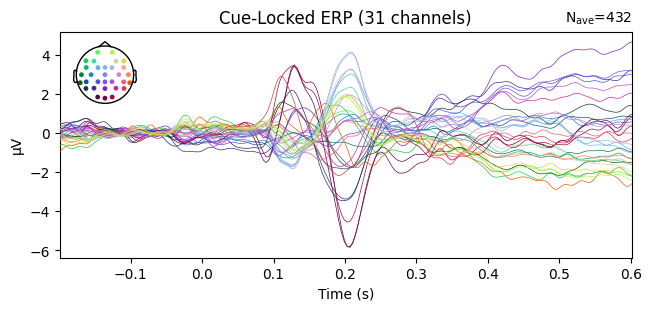

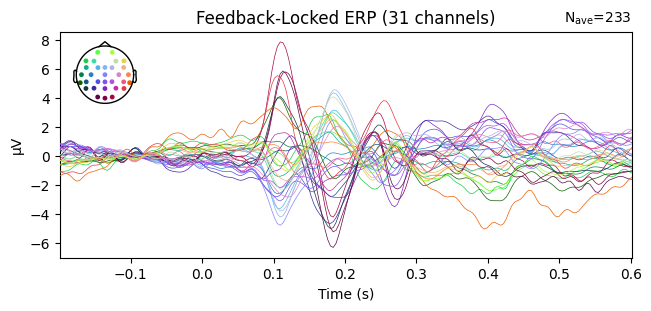

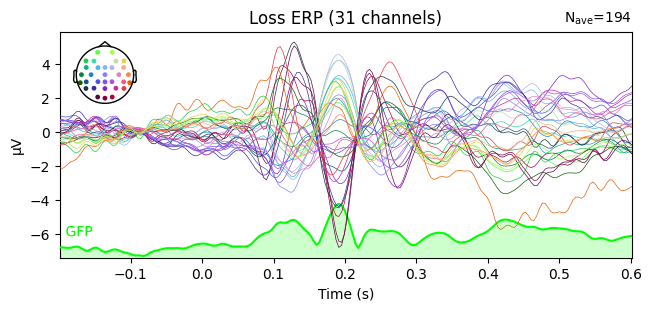

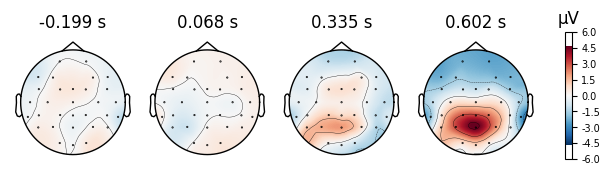

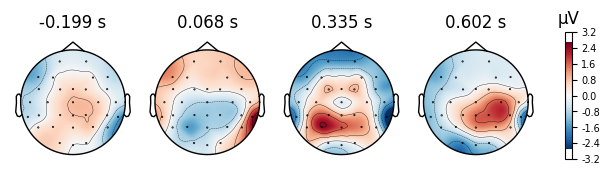

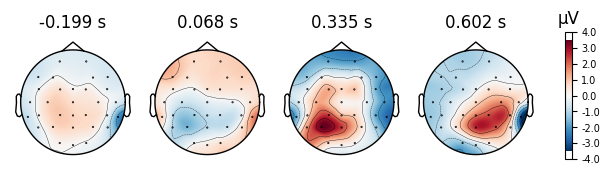

No projector specified for this dataset. Please consider the method self.add_proj.


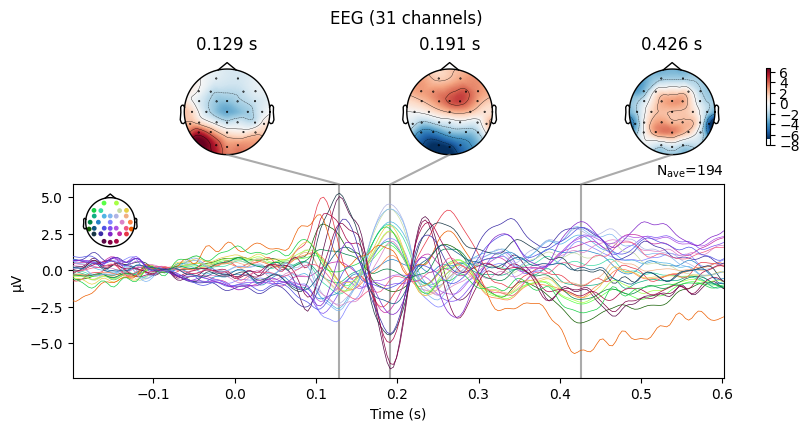

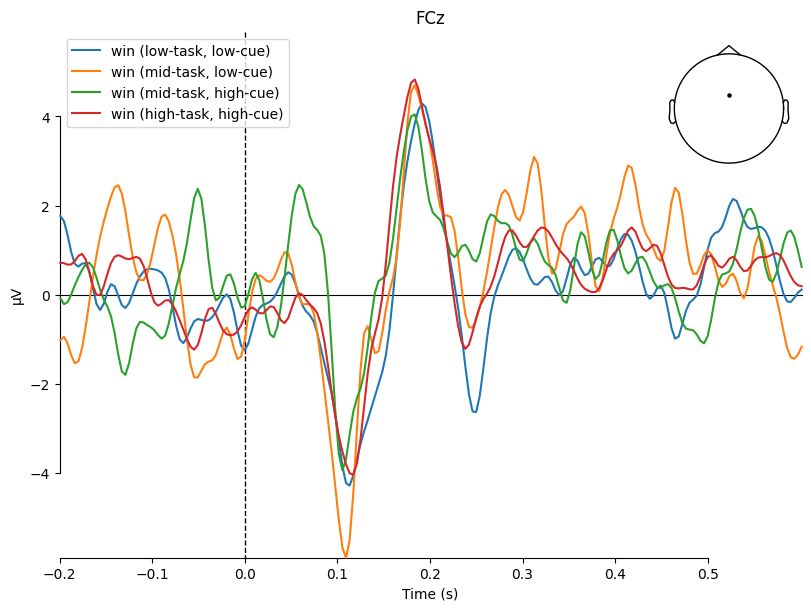

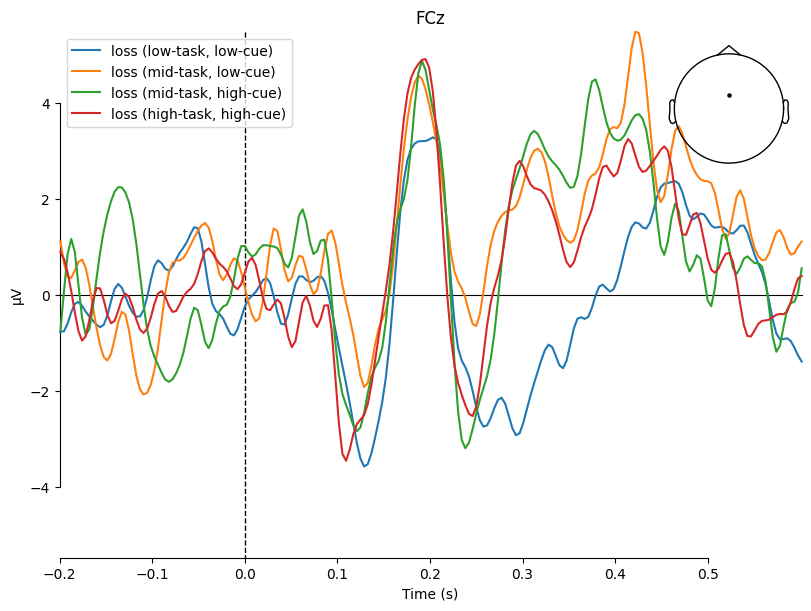

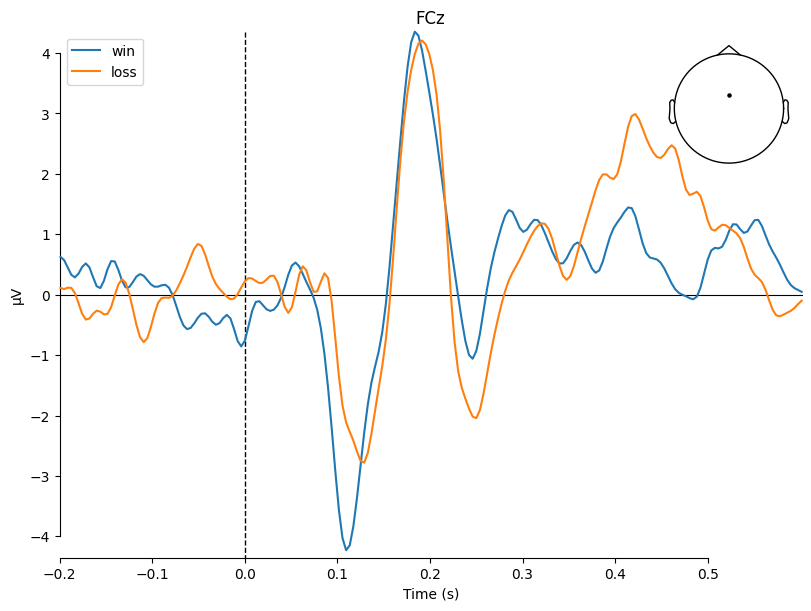

[<Figure size 800x600 with 2 Axes>]

In [25]:
from scipy.stats import ttest_rel

# Step 6: ERP Computation
cue_evoked = cue_epochs.average()
feedback_evoked = feedback_epochs.average()
# cue_evoked.save("subject27_cue_evoked-ave.fif", overwrite=True)
# feedback_evoked.save("subject27_feedback_evoked-ave.fif", overwrite=True)

# Step 7: ERP Analysis
# Extract P300 peaks for Cue-locked ERP at FCz
fc_z_index = cue_evoked.info['ch_names'].index('FCz')
p300_latency, p300_amplitude = cue_evoked.get_peak(ch_type='eeg', mode='pos', tmin=0.2, tmax=0.4)
peak_amplitude_fc_z = cue_evoked.data[fc_z_index].max()
print(p300_amplitude)
print(f"P300 Peak at FCz: Amplitude = {peak_amplitude_fc_z} µV, Latency = {p300_latency} s")

# Step 8: Visualization
# Plot ERP waveforms
cue_evoked.plot(titles="Cue-Locked ERP");
feedback_evoked.plot(titles="Feedback-Locked ERP");

loss_evoked = loss_epochs_list.average()
loss_evoked.plot(titles="Loss ERP", gfp=True)


import matplotlib.pyplot as plt
import numpy as np

# plt.plot(win_epochs.values())
all_wins = {}
for epoch in win_epochs:
    # win_epochs[epoch].average().plot(picks="FCz", titles=epoch)
    all_wins[epoch] = win_epochs[epoch].average() #.plot(picks="FCz", titles=epoch)


all_losses = {}
for epoch in loss_epochs:
    # print(epoch)
    # win_epochs[epoch].average().plot(picks="FCz", titles=epoch)
    all_losses[epoch] = loss_epochs[epoch].average() #.plot(picks="FCz", titles=epoch)


# plt.plot(np.array(wtf).T)

# Plot topographies
cue_evoked.plot_topomap()
feedback_evoked.plot_topomap()
loss_evoked.plot_topomap()

loss_evoked.plot_joint()

mne.viz.plot_compare_evokeds(all_wins, picks="FCz")
mne.viz.plot_compare_evokeds(all_losses, picks="FCz")
mne.viz.plot_compare_evokeds(dict(win=feedback_evoked, loss=loss_evoked), picks="FCz")

# mne.viz.plot_compare_evokeds(cue_evoked, picks="FCz")

# Step 10: Save Cleaned Data
# cleaned_path = "cleaned_subject27_raw.fif"
# raw.save(cleaned_path, overwrite=True)
# print("Artifact removal and analysis complete. Cleaned data saved to:", cleaned_path)

Paired t-test: t = [ 8.16310695e-15  1.22859565e-14  1.78211240e-14  2.09751900e-14
  1.79429427e-14  8.22986014e-15 -1.79327125e-15 -2.45451975e-15
  3.83544759e-15  2.73297100e-14  1.46419406e-14  4.70366754e-15
 -1.34877568e-15  1.66540156e-15  1.16575466e-14  1.67329508e-14
  1.20473385e-14  3.82781512e-15 -4.12831450e-15 -9.52132863e-15
 -7.05329504e-15 -9.13246584e-16  1.06871733e-15 -1.47971369e-15
 -2.78948671e-15 -3.58261697e-16  1.01456189e-14  1.65091121e-14
  9.33472675e-15 -1.26719836e-15 -1.03715445e-14 -1.42530961e-14
 -1.37213686e-14 -8.70778262e-15 -2.10466584e-15  6.66690141e-16
 -3.13549743e-15 -9.78259952e-15 -1.69387481e-14 -1.99004102e-14
 -1.65455325e-14 -1.22636425e-14 -7.57383105e-15 -5.09718430e-15
 -3.77692954e-15 -5.29171629e-15 -2.86459393e-15 -2.04941917e-15
 -1.60276114e-15 -3.90261554e-15 -6.65319085e-15 -1.09310728e-14
 -1.35839280e-14 -1.40104519e-14 -1.19910814e-14 -7.34000577e-15
 -7.48734553e-15 -7.83888504e-15 -8.15229172e-15 -4.92248900e-15
 -3.47

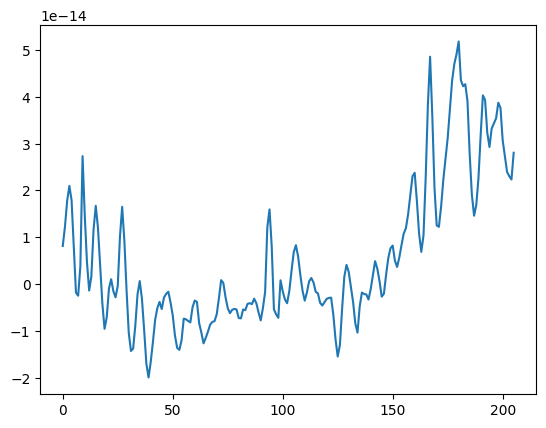

In [26]:

# Step 9: Statistical Comparison
# Compare ERP amplitudes for low vs. high task conditions
data_low = feedback_epochs['Stimulus/S  6'].average().data
data_high = feedback_epochs['Stimulus/S 16'].average().data
t_stat, p_val = ttest_rel(data_low, data_high)
print(f"Paired t-test: t = {t_stat}, p = {p_val}")

plt.plot(t_stat)

# alpha = 0.05

# if p_val < alpha:
#     print("Reject the null hypothesis; there is a significant difference between the sample mean and the hypothesized population mean.")
# else:
#     print("Fail to reject the null hypothesis; there is no significant difference between the sample mean and the hypothesized population mean.")

In [ ]:
from autoreject import AutoReject
ar = AutoReject()
epochs_clean = ar.fit_transform(cue_epochs)  